## Towards modelling  biotechnological wastewater treatment processes through lattice Boltzmann method - Part 2

###  Data analysis


In this notebook, we will perform an analysis of the scientific studies on mathematical modelling of biotechnological processes related to wastewater treatment systems by using Lattice Boltzmann Method (LBM).

To do it, it was created a dataset containing the main information extracted in the papers assessed and our analysis is based on it!

Most of the data in the column 'Normalized error for model validation (%)' from our dataset, were extracted from original papers and analysed according to the [Part 3](Part 3 - Data-literature-studies.ipynb) of this series.

### Checking Python Version

In [1]:
from platform import python_version
print(python_version())

3.6.8


### Importing libraries

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import math
from math import*
from numpy import log as ln
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import pandas as pd
from pylab import * 
from scipy import *
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/home/mone/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


### Assessing our dataset

In [89]:
table = pd.read_csv('data-table.csv', encoding='utf-8', sep=',')
table = table.replace('\n', ' ', regex=True)
table

,Process,Substrate,Parameters Assessed,Collision Model,Lattice Dimension,Boundary condition,Computational Domain (lu),Bio- model,Normalized error for model validation (%),Ref.
0,Mono-species biofilm growth,NaN,- Fluid flow - Mass transfer - Bioreaction,BGK,U field: D2Q9 C field: D2Q9,- Non-slip: fluid/biofilm interface - Inlet: C...,Grid nodes: - Re 0.032 to 0.255 Nx = 480 Nz =...,- Monod kinetic,NaN,Picioreanu et al. (2000a)
1,Mono-species biofilm growth,NaN,- Fluid flow - Mass transfer - Bioreaction,BGK,U field: D2Q9 C field: D2Q9,- Non-slip: fluid/biofilm interface - Inlet: C...,Grid nodes: Nx = 512 Nz = 129,- Monod kinetic - Cellular automata,NaN,Picioreanu et al (2000b)
2,Biofilm growth in porous media,NaN,- Fluid flow - Mass transfer - Bioreaction,BGK,U field: D3Q19 C field: D3Q19,- Non-periodic solid wall - Non-slip: liquid/ ...,Grid nodes: Nx = 120 Ny = 120 Nz = 120,- Monod kinetic - IbM model,NaN,Graf von der Schulenburg et al (2009)
3,Reverse osmosis,NaN,- Membrane biofouling - Hydrodynamic -Mass tr...,MRT,U field: D3Q19 C field: D3Q19,- Non-periodic solid wall - Non-slip: liquid/ ...,Grid nodes: Nx = 120 Ny = 120 Nz = 120,- Monod kinetic - IbM model,57.190,Pintelon et al. (2010)
4,Photosynthetic Bioreactor,Glucose,- Fluid flow - Mass transfer - PSB grow - H2...,BGK,U field: D2Q9 C field: D2Q5,- Curved boundary: non-equilibrium extrapolati...,Grid nodes: Nx = 441 Ny = 83,- Monod kinetic,5.850,Yang et al. (2011)
5,Degradation of herbicide in microﬂuidic ﬂow ce...,"R-2,4-DP*",- Fluid flow - Mass transfer - Bioreaction - ...,BGK,U field: D2Q9 C field: ﬁnite difference,- Inlet: constant concentration - Solid walls/...,x = 3H y = 4P + D Where: H: length D: 400µm P...,- Monod kinetic - Cellular automata,4.970,Tang et al. (2013)
6,Couette–Taylor photobioreactor,NaN,- Fluid flow,BGK,U field: D3Q19,- Curved moving wall: Filippova-Hänel - Bounce...,Grid Node at transverse plane: Nx = 64 Ny = 64,- PSF stochastic model for microalgae (parall...,10.880,Štumbauer et al. (2013)
7,Photosynthetic Bioreactor with porous granule ...,Glucose,- Fluid flow - Mass transfer - PSB grow - H2...,REV-scale LB,U field: D2Q9 C field: D2Q5,"- Inlet, outlet: Periodic - Top, bottom: U=U0 ...",Multi-block LBM: - Coarse block 0 ≤ X ≤ L/2 ...,- Monod kinetic,16.000,Liao et al. (2013)
8,Photosynthetic Bioreactor,Glucose,- Fluid flow - Mass transfer - Bioreaction ...,Pore-scale LB/ QSGS,U field: D3Q15 C field: D3Q7,"- Inlet: U=U0, C=C0. - Wall: U=0; - Outlet: f...",Multi-block LBM (grid density): - Fine block:...,- Monod kinetic,5.650,Liao et al. (2017)
9,Mono-species biofilm growth in porous media,NaN,- Fluid flow - Mass transfer - Bioreaction,BGK,U field: D3Q19 C field: D3Q19,"- Non-slip:fluid/solid, fluid/biofilm interfac...",Nodes: Nx = 150 Nz = 150,- Monod kinetic - Cellular automata,46.160,Benioug et al. (2017)


Notes: Where: BGK:  Bhatnagar-Gross-Krook; C: concentration; HLBM: Homogenised Lattice-Boltzmann Model; HRT: hydraulic retention time; IbM: Individual- based model; MRT: Multiple relaxation time; P: pressure; PBS: photosynthetic bacteria; PSF: photosynthetic factory; QSGS: quartet structure generation; REV: representative elementary volume, U: velocity; n.a.: not available

*R-2,4-DP: (R)-2-(2,4-dichloro-phenoxy)propionate


I would like to stress that the column **'Normalized error for model validation (%)'** was built through the analysis made in [Part3](Part 3 - Data-literature-studies.ipynb) of this project.
Here, it is worth to mention that the authors *Picioreanu et al. (2000a)*, *Picioreanu et al. (2000b)* and *Graf von der Schulenburg et al (2009)* did not perform validation of their studies with experimental assays or model reference. Meanwhile, *Liao et al. (2017)* had presented this analysis in their study.

### Getting some dataset information

In [90]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 10 columns):
Process                                      16 non-null object
Substrate                                    9 non-null object
Parameters Assessed                          16 non-null object
Collision Model                              16 non-null object
Lattice Dimension                            16 non-null object
Boundary condition                           16 non-null object
Computational Domain (lu)                    16 non-null object
Bio- model                                   15 non-null object
Normalized error for model validation (%)    13 non-null float64
Ref.                                         16 non-null object
dtypes: float64(1), object(9)
memory usage: 1.3+ KB


### Checking if there is NaN values in the dataset

In [91]:
table.isnull().values.any()

True

### Which were the authors assesed? 

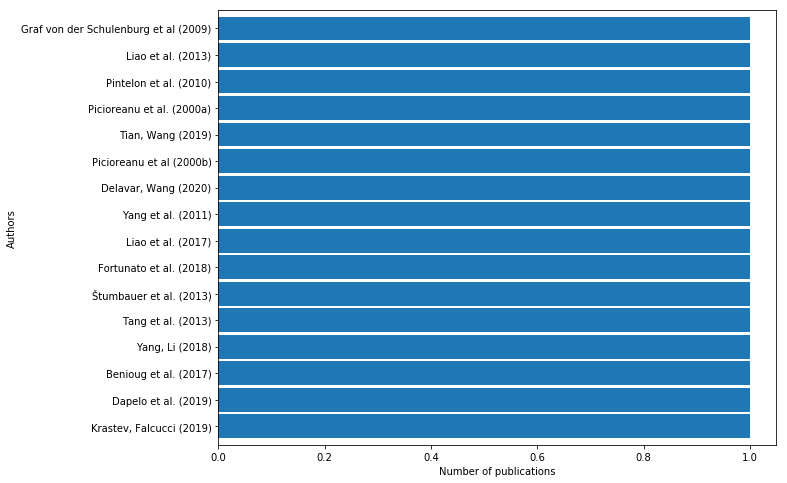

In [92]:
table['Ref.'].value_counts().plot('barh', width=0.9, figsize=(10,8)).invert_yaxis()
plt.xlabel('Number of publications')
plt.ylabel('Authors')
plt.show()

In [93]:
table['Ref.']

0                 Picioreanu et al. (2000a)
1                  Picioreanu et al (2000b)
2     Graf von der Schulenburg et al (2009)
3                    Pintelon et al. (2010)
4                        Yang et al. (2011)
5                        Tang et al. (2013)
6                   Štumbauer et al. (2013)
7                        Liao et al. (2013)
8                        Liao et al. (2017)
9                     Benioug et al. (2017)
10                  Fortunato et al. (2018)
11                          Yang, Li (2018)
12                        Tian, Wang (2019)
13                 Krastev, Falcucci (2019)
14                     Dapelo et al. (2019)
15                     Delavar, Wang (2020)
Name: Ref., dtype: object

### Which are the older studies, conducted before 2010?

In [94]:
table['Ref.'].head(3)

0                Picioreanu et al. (2000a)
1                 Picioreanu et al (2000b)
2    Graf von der Schulenburg et al (2009)
Name: Ref., dtype: object

### Which are the plus recent studies, conducted after 2018?

In [95]:
table['Ref.'].tail(6)

10     Fortunato et al. (2018)
11             Yang, Li (2018)
12           Tian, Wang (2019)
13    Krastev, Falcucci (2019)
14        Dapelo et al. (2019)
15        Delavar, Wang (2020)
Name: Ref., dtype: object

### Which were the processes analised?

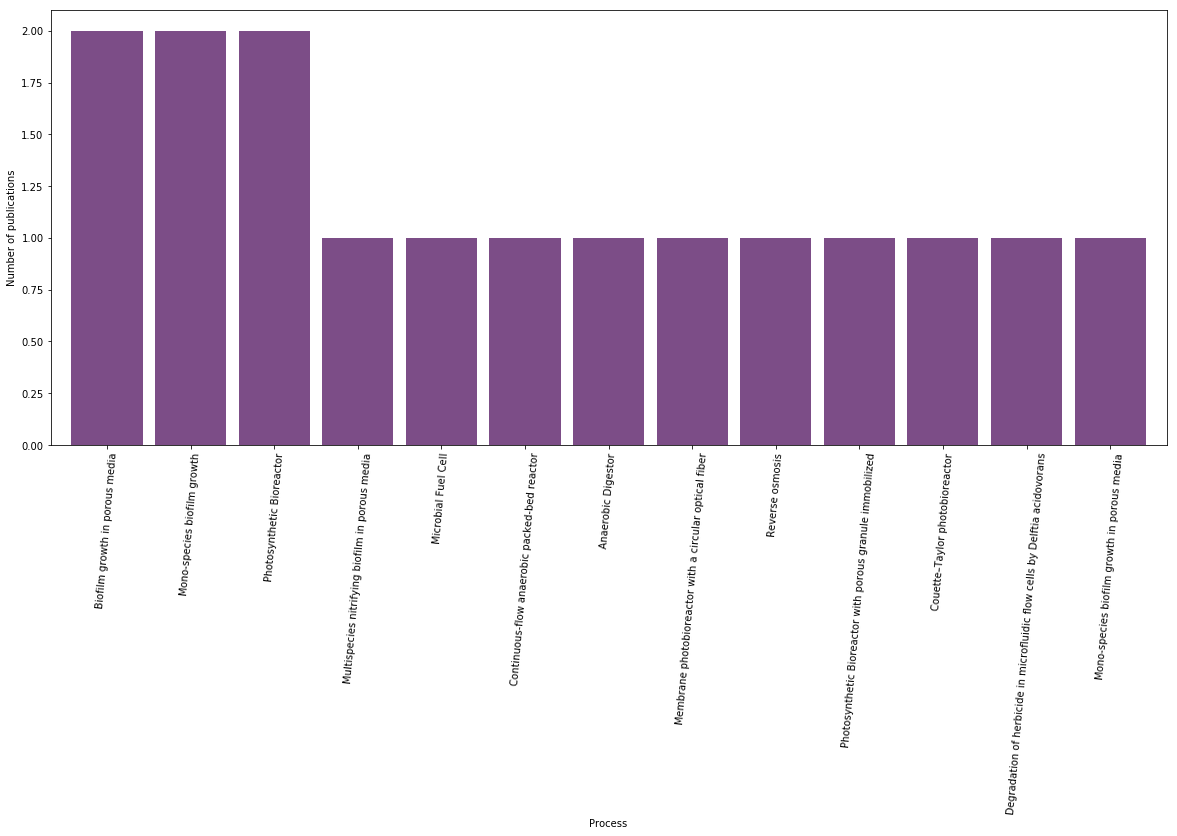

In [96]:
table['Process'].value_counts().plot('bar', colormap='viridis', width=0.85, alpha=0.7, figsize=(20,8))
plt.xticks(rotation=85)
plt.xlabel('Process')
plt.ylabel('Number of publications')
plt.show()

In [97]:
table['Process'].value_counts()

Biofilm growth in porous media                                              2
Mono-species biofilm growth                                                 2
Photosynthetic Bioreactor                                                   2
Multispecies nitrifying biofilm in porous media                             1
Microbial Fuel Cell                                                         1
Continuous-flow anaerobic packed-bed reactor                                1
Anaerobic Digestor                                                          1
Membrane photobioreactor with a circular optical fiber                      1
Reverse osmosis                                                             1
Photosynthetic Bioreactor with porous granule immobilized                   1
Couette–Taylor photobioreactor                                              1
Degradation of herbicide in microﬂuidic ﬂow cells by Delftia acidovorans    1
Mono-species biofilm growth in porous media                     

### Which was the collision model most applied?

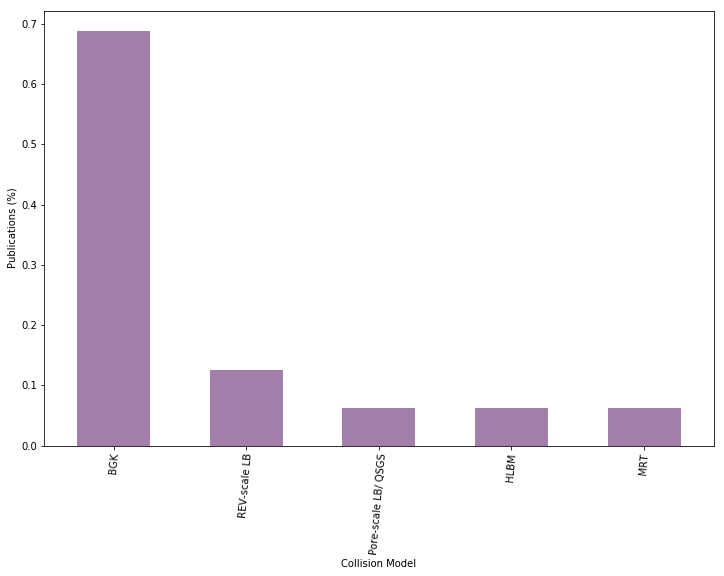

In [98]:
table['Collision Model'].value_counts(normalize=True).plot('bar', colormap='viridis', width=0.55, alpha=0.5, figsize=(12,8))
plt.xticks(rotation=85)
plt.xlabel('Collision Model')
plt.ylabel('Publications (%)')
plt.show()

In [99]:
table['Collision Model'].value_counts()

BGK                    11
REV-scale LB            2
Pore-scale LB/ QSGS     1
HLBM                    1
MRT                     1
Name: Collision Model, dtype: int64

In [100]:
table['Collision Model'].describe()

count      16
unique      5
top       BGK
freq       11
Name: Collision Model, dtype: object

In [101]:
print('Between', table['Collision Model'].describe()['unique'], 
      'collision models reported, the majority of publications,', 'counting', 
      table['Collision Model'].describe()['freq'],
      'papers, report',table['Collision Model'].describe()['top'], 
      'as the most applied')

Between 5 collision models reported, the majority of publications, counting 11 papers, report BGK as the most applied


### Which was the most common lattice dimension?

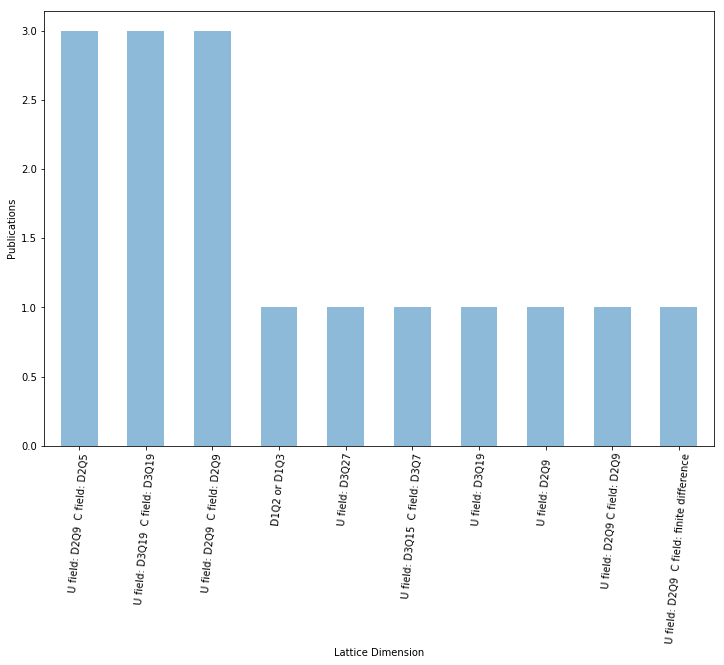

In [102]:
table['Lattice Dimension'].value_counts().plot('bar', width=0.55, alpha=0.5, figsize=(12,8))
plt.xticks(rotation=85)
plt.xlabel('Lattice Dimension')
plt.ylabel('Publications')
plt.show()

In [103]:
table['Lattice Dimension'].describe() 

count                               16
unique                              10
top       U field: D2Q9  C field: D2Q5
freq                                 3
Name: Lattice Dimension, dtype: object

In [104]:
table['Lattice Dimension'].value_counts()   

U field: D2Q9  C field: D2Q5                3
U field: D3Q19  C field: D3Q19              3
U field: D2Q9  C field: D2Q9                3
D1Q2 or D1Q3                                1
U field: D3Q27                              1
U field: D3Q15  C field: D3Q7               1
U field: D3Q19                              1
U field: D2Q9                               1
U field: D2Q9 C field: D2Q9                 1
U field: D2Q9  C field: ﬁnite difference    1
Name: Lattice Dimension, dtype: int64

<span style="color:gray">*where: U=velocity; C=concentration</span>



### Which were most common the boundary conditions applied ?

In [105]:
table['Boundary condition'].describe()

count                                                    16
unique                                                   14
top       - Non-slip: fluid/biofilm interface - Inlet: C...
freq                                                      2
Name: Boundary condition, dtype: object

In [106]:
table['Boundary condition'].value_counts()

- Non-slip: fluid/biofilm interface - Inlet: C constant  - Outlet: Cgradient = 0, Top: U = 0 - Biofilm: impermeable walls borders at left, right and bottom                                                                                      2
- Non-periodic solid wall - Non-slip: liquid/ biofilm and solid/liquid interface - Inlet: U and C constant - Outlet: P constant, diffusive flux = 0 - impermeability: solid-fluid interface - Mass flux continuity: biofilm/ liquid interface    2
- Multilevel bounce-back - Periodic in x and no-slip in y                                                                                                                                                                                        1
- Non-slip:fluid/solid, fluid/biofilm interface - Immersed Boundary                                                                                                                                                                              1
- Inlet: U and C constant - 

### Which were the most common parameters assessed?

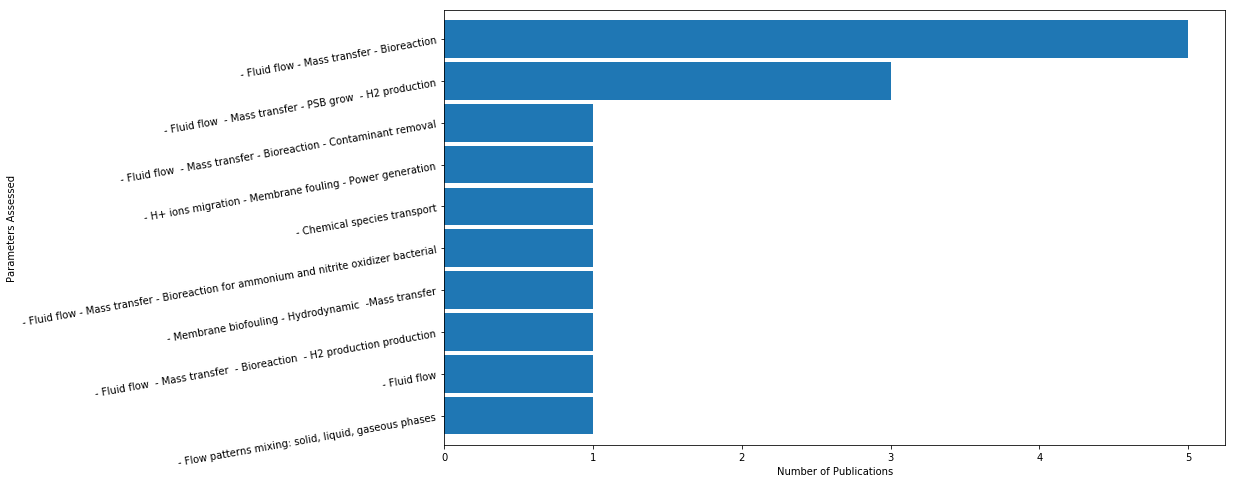

In [107]:
table['Parameters Assessed'].value_counts().plot('barh', width=0.9, figsize=(14,8)).invert_yaxis()
plt.yticks(rotation=10)
plt.ylabel('Parameters Assessed')
plt.xlabel('Number of Publications')
plt.show()

In [108]:
table['Parameters Assessed'].value_counts()

- Fluid flow - Mass transfer - Bioreaction                                                5
- Fluid flow  - Mass transfer - PSB grow  - H2 production                                 3
- Fluid flow  - Mass transfer - Bioreaction - Contaminant removal                         1
- H+ ions migration - Membrane fouling - Power generation                                 1
- Chemical species transport                                                              1
- Fluid flow - Mass transfer - Bioreaction for ammonium and nitrite oxidizer bacterial    1
- Membrane biofouling - Hydrodynamic  -Mass transfer                                      1
- Fluid flow  - Mass transfer  - Bioreaction  - H2 production production                  1
- Fluid flow                                                                              1
- Flow patterns mixing: solid, liquid, gaseous phases                                     1
Name: Parameters Assessed, dtype: int64

### Which was the most common kinetic model used to assess microbial growth?

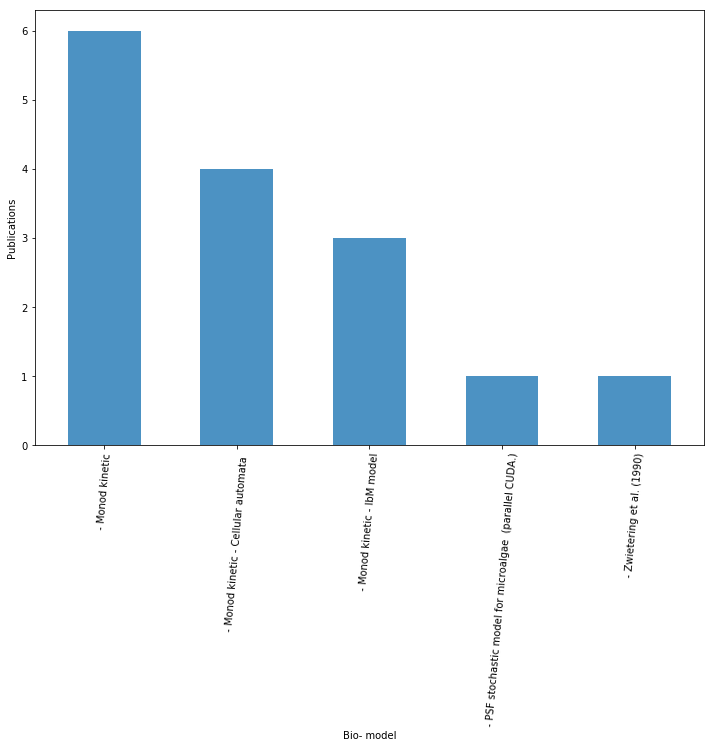

In [109]:
table['Bio- model'].value_counts().plot('bar', width=0.55, alpha=0.8, figsize=(12,8))
plt.xticks(rotation=85)
plt.xlabel('Bio- model')
plt.ylabel('Publications')
plt.show()

In [110]:
table['Bio- model'].value_counts()

- Monod kinetic                                            6
- Monod kinetic - Cellular automata                        4
- Monod kinetic - IbM model                                3
- PSF stochastic model for microalgae  (parallel CUDA.)    1
- Zwietering et al. (1990)                                 1
Name: Bio- model, dtype: int64

<span style="color:red; font-size:1.1em;"  > According to the analysis above &uarr;&uarr;&uarr;, **Monod** appears as the kinetic model most common. </span>

### Which kind of substrate was adopted to simulate bacterial growth?

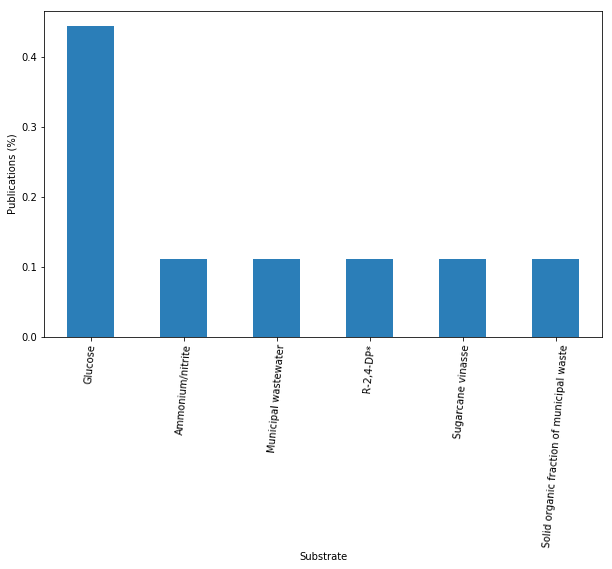

In [111]:
table['Substrate'].value_counts(normalize=True).plot('bar', width=0.5, alpha=0.95, figsize=(10,6))
plt.xticks(rotation=85)
plt.xlabel('Substrate')
plt.ylabel('Publications (%)')
plt.show()

In [112]:
table['Substrate'].value_counts()

Glucose                                      4
Ammonium/nitrite                             1
Municipal wastewater                         1
R-2,4-DP*                                    1
Sugarcane vinasse                            1
Solid organic fraction of municipal waste    1
Name: Substrate, dtype: int64

<span style="color:red; font-size:1.1em;"  > According to the analysis above &uarr;&uarr;&uarr; **glucose** appears as the most common substrate. </span>

### How many studies were not validated with experimental or reference models?

In [113]:
table.isnull().sum(axis = 0)

Process                                      0
Substrate                                    7
Parameters Assessed                          0
Collision Model                              0
Lattice Dimension                            0
Boundary condition                           0
Computational Domain (lu)                    0
Bio- model                                   1
Normalized error for model validation (%)    3
Ref.                                         0
dtype: int64

<span style="color:red; font-size:1.1em;"  > According to the analysis above &uarr;&uarr;&uarr; , we can observe that there were **3 studies**.</span>

### Getting some statistical information about model validation from the studies assessed

In [114]:
table['Normalized error for model validation (%)'].dropna().describe()

count    13.000000
mean     17.437308
std      16.866262
min       0.890000
25%       5.850000
50%      11.420000
75%      16.600000
max      57.190000
Name: Normalized error for model validation (%), dtype: float64

### Which were the authors who did not validate their studies with experimental or reference models?

In [115]:
table[['Normalized error for model validation (%)','Ref.']]

,Normalized error for model validation (%),Ref.
0,NaN,Picioreanu et al. (2000a)
1,NaN,Picioreanu et al (2000b)
2,NaN,Graf von der Schulenburg et al (2009)
3,57.190,Pintelon et al. (2010)
4,5.850,Yang et al. (2011)
5,4.970,Tang et al. (2013)
6,10.880,Štumbauer et al. (2013)
7,16.000,Liao et al. (2013)
8,5.650,Liao et al. (2017)
9,46.160,Benioug et al. (2017)


<span style="color:red; font-size:1.1em;">The studies were those present **NaN** values: Picioreanu et al. (2000a), Picioreanu et al (2000b) and Graf von der Schulenburg et al (2009).</span>

### Plotting some data

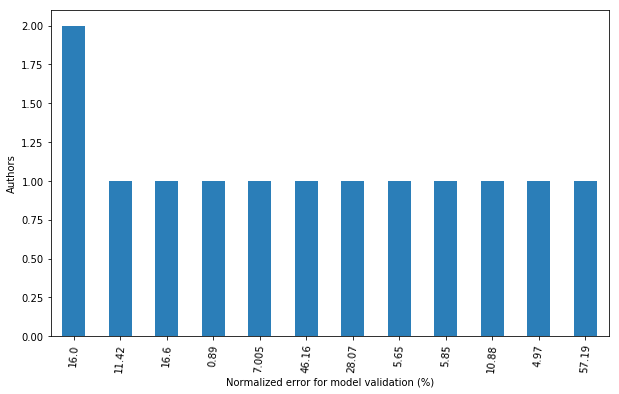

In [116]:
table['Normalized error for model validation (%)'].value_counts().plot('bar', width=0.5, alpha=0.95, figsize=(10,6))
plt.xticks(rotation=85)
plt.ylabel('Authors')
plt.xlabel('Normalized error for model validation (%)')
plt.show()

In [122]:
table = table.sort_values('Normalized error for model validation (%)', ascending = True)
norm_error = table['Normalized error for model validation (%)'].dropna()
print(norm_error)

12     0.890
5      4.970
8      5.650
4      5.850
13     7.005
6     10.880
15    11.420
7     16.000
11    16.000
14    16.600
10    28.070
9     46.160
3     57.190
Name: Normalized error for model validation (%), dtype: float64


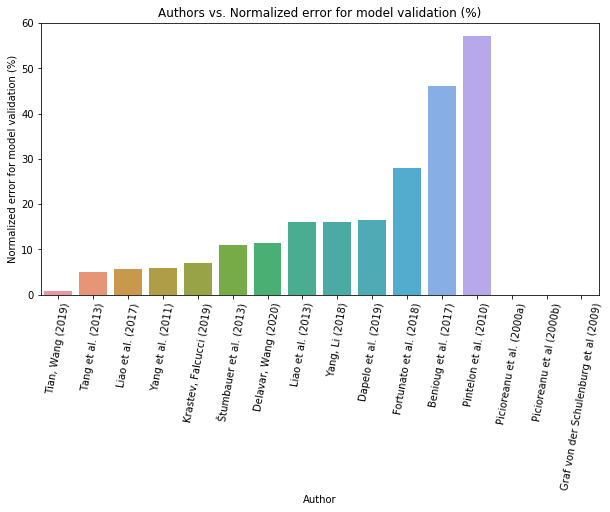

In [123]:
author = table['Ref.']
plt.figure(figsize=(10,5))
sns.barplot(x=author,y=norm_error)
plt.xticks(rotation=80)
plt.xlabel('Author')
plt.ylabel('Normalized error for model validation (%)')
plt.title('Authors vs. Normalized error for model validation (%)')
plt.show()

### Which was the plus acurate value, with lower Normalized error for model validation?

In [124]:
print ('The plus accurate: %.3f' % table['Normalized error for model validation (%)'].min())

The plus accurate: 0.890


### Which was the plus acurate model, with lower Normalized error for model validation?

In [125]:
print('The less accurate: %.3f' %table['Normalized error for model validation (%)'].max())

The less accurate: 57.190


### Which was the mean normalized error for model validation?

In [126]:
print('The mean was: %.3f' %table['Normalized error for model validation (%)'].mean())

The mean was: 17.437


### Is there some relationship between the error and collision model adopted?

In [127]:
table.groupby('Collision Model')['Normalized error for model validation (%)'].mean()

Collision Model
BGK                    14.405625
HLBM                   16.600000
MRT                    57.190000
Pore-scale LB/ QSGS     5.650000
REV-scale LB           16.000000
Name: Normalized error for model validation (%), dtype: float64

In [128]:
table.groupby('Collision Model')['Normalized error for model validation (%)'].max()

Collision Model
BGK                    46.16
HLBM                   16.60
MRT                    57.19
Pore-scale LB/ QSGS     5.65
REV-scale LB           16.00
Name: Normalized error for model validation (%), dtype: float64

In [129]:
table.groupby('Collision Model')['Normalized error for model validation (%)'].min()

Collision Model
BGK                     0.89
HLBM                   16.60
MRT                    57.19
Pore-scale LB/ QSGS     5.65
REV-scale LB           16.00
Name: Normalized error for model validation (%), dtype: float64

### Histogram plot: Frequency vs. Normalized error for model validation

Text(0,0.5,'Frequency')

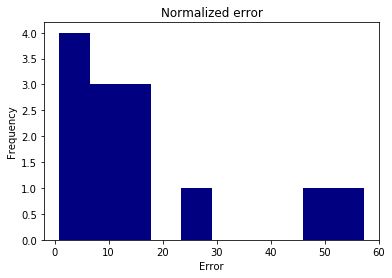

In [130]:
table['Normalized error for model validation (%)'].plot.hist(title='Normalized error', colormap='jet')
plt.xlabel('Error')
plt.ylabel('Frequency')

We can observe tha most of models diverged < 20%, compared with its references for validtion. 

------------------------------------------------------------------------------------------------------------------
## Some insights...
__________________________________________________________________________________________________________________

Considering the analyses above, we propose here a generic schema to modelling biotechnological wastewater treatment processes through the lattice Boltzmann method.
The model constitutes basically in 3 parts:
- Fluid flow: to compute velocity field;
- Mass Transfer: to compute the concentration field;
- Bioreaction: to compute bacterial activity

For fluid flow and mass transfer would be interesting adopt coupled LBM algorithms, instead, in case of bioreaction and considering Monod kinetics, cellular automata algorithm could be a good alternative to model microbial division.
A scheme in show bellow:

![Model](images/generic-model_Bio_LBM.jpeg)

## References

Fortunato VA, Caneppele FL, Ribeiro R, Rabi JA (2017) Development of in-house lattice-Boltzmann simulator of bioreactors for wastewater treatment: basic concepts and initial results. Water Science and Technology 77:838–847. doi: 10.2166/wst.2017.597

Krastev VK, Falcucci G (2019) Evaluating the electrochemical and power performances of microbial fuel cells across physical scales: A novel numerical approach. International Journal of Hydrogen Energy 44:4468–4475. doi: 10.1016/j.ijhydene.2018.11.226

Liao Q, Yang YX, Zhu X, Chen R (2013) Lattice Boltzmann simulation of substrate solution through a porous granule immobilized PSB-cell for biohydrogen production. International Journal of Hydrogen Energy 38:15700–15709. doi: 10.1016/j.ijhydene.2013.04.056

Liao Q, Yang Y-X, Zhu X, et al (2017) Pore-scale lattice Boltzmann simulation of flow and mass transfer in bioreactor with an immobilized granule for biohydrogen production. Science Bulletin 62:22–30. doi: 10.1016/j.scib.2016.11.004

Picioreanu C, Loosdrecht MCMV, Heijnen JJ (2000) Effect of diffusive and convective substrate transport on biofilm structure formation: A two-dimensional modeling study. Biotechnology and Bioengineering 69:504–515. doi: 10.1002/1097-0290(20000905)69:5<504::aid-bit5>3.0.co;2-s

Picioreanu C, Loosdrecht MCMV, Heijnen JJ (2000) A theoretical study on the effect of surface roughness on mass transport and transformation in biofilms. Biotechnology and Bioengineering 68:355–369. doi: 10.1002/(sici)1097-0290(20000520)68:4<355::aid-bit1>3.0.co;2-a

Pintelon TR, Creber SA, Daniel A. Graf Von Der Schulenburg, Johns ML (2010) Validation of 3D simulations of reverse osmosis membrane biofouling. Biotechnology and Bioengineering 106:677–689. doi: 10.1002/bit.22717

Tang Y, Valocchi AJ, Werth CJ, Liu H (2013) An improved pore-scale biofilm model and comparison with a microfluidic flow cell experiment. Water Resources Research 49:8370–8382. doi: 10.1002/2013wr013843

Tian Z, Wang J (2019) Lattice Boltzmann simulation of biofilm clogging and chemical oxygen demand removal in porous media. AIChE Journal. doi: 10.1002/aic.16661

Yang Y, Liao Q, Zhu X, et al (2011) Lattice Boltzmann simulation of substrate flow past a cylinder with PSB biofilm for bio-hydrogen production. International Journal of Hydrogen Energy 36:14031–14040. doi: 10.1016/j.ijhydene.2011.04.026

Yang Y, Li J (2018) Simulation of photobioreaction for hydrogen production in membrane bioreactor with an optical fiber. Applied Physics A. doi: 10.1007/s00339-018-1790-3

Štumbauer V, Petera K, Štys D (2013) The lattice Boltzmann method in bioreactor design and simulation. Mathematical and Computer Modelling 57:1913–1918. doi: 10.1016/j.mcm.2011.12.033

                                        
                                        
                                                        
                                                  **This study is open to contribution!**